In [172]:
import utilities as u

In [173]:
import re

In [174]:
import itertools

In [175]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [176]:
import pathlib



In [177]:
analysis_directory = 'output/'

In [178]:
P = pathlib.Path(analysis_directory)

In [179]:
fgnamefile = 'tsz'
nu = 148
config = 'h3500s3500b3500'

In [180]:
Path = P/config
Path = Path/fgnamefile

In [181]:
Noah = pandas.read_csv('../extract_sehgal/Ckk_biases_lmaxT_3500.csv')

In [243]:
shear = 'SH'
qe = 'QE'

estimator = shear

if estimator == shear:
    estimatorn = 'Shear'
    index = 1
else:
    estimatorn = qe
    index = 0

In [244]:
read_element = lambda key: np.load(Path/f'{key}_{fgnamefile}_{nu}.npy')

kk = read_element('kk')
ells = read_element('ells')

In [245]:
getNoah = lambda e, b, f: Noah[f'{e} {b}, {f}']
getNoah_tSZ = lambda e, b: getNoah(e, b, 'tSZ')

getNoah_tSZ_trispectrum = lambda e: getNoah_tSZ(e, 'trispectrum')
getNoah_tSZ_primary = lambda e: getNoah_tSZ(e, 'primary')
getNoah_tSZ_secondary = lambda e: getNoah_tSZ(e, 'secondary')

NoahT = getNoah_tSZ_trispectrum(estimatorn)
NoahP = getNoah_tSZ_primary(estimatorn)
NoahS = getNoah_tSZ_secondary(estimatorn)

NoahCents = Noah['lCen']

In [246]:
#clkkmanu = 0.
Nmanu = 80
clqmanu = 0.
clpmanu = 0.
clsmanu = 0.

for num in range(Nmanu):
    lCen, ClQ, Clprim, Clcross, kk_thmanu = np.loadtxt(f'../extract_sehgal/LensQuEst-1/out_txt/{estimator}_tris_prim_sec_{num}.txt', unpack = True)
    clqmanu += ClQ
    clpmanu += Clprim
    clsmanu += Clcross
    #clkkmanu += clkkmanu_
#clkkmanu /= 5
clqmanu /= Nmanu
clpmanu /= Nmanu
clsmanu /= Nmanu

In [247]:
Plotting = u.Plotting('Biases', lminplot = 30, lmaxplot = 2000, xscale = 'log')

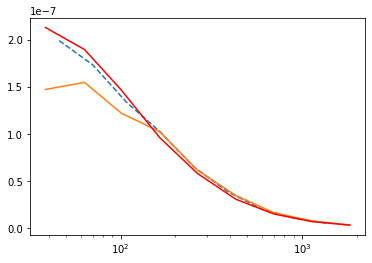

In [248]:
Plotting.plotsel(ells, kk, ls = '--')
Plotting.plotsel(ll, clkkmanu)
Plotting.plotsel(lCen, kk_thmanu, color = 'red')
#plt.yscale('log')
plt.xscale('log')


In [255]:
tipo = 'T'
bias = read_element(tipo)
scatters = np.load(Path/f'scatter_{tipo}_{fgnamefile}_{nu}.npy')


scatter = scatters[index, index]
mean = bias[index, index]

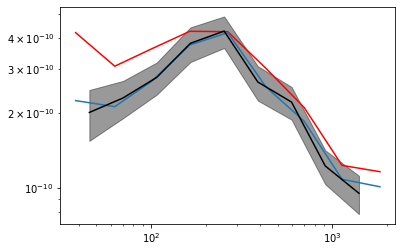

In [256]:
Plotting = u.Plotting(f'Trispectrum {estimator}', lminplot = 30, lmaxplot = 2000, xscale = 'log')
Plotting.plotsel(NoahCents, NoahT, color = 'red')
Plotting.plotsel(lCen, clqmanu)
Plotting.plotsel(ells, mean, scatter, color = 'black')
plt.xscale('log')
plt.yscale('log')

In [251]:
tipo = 'P'
bias = read_element(tipo)
scatters = np.load(Path/f'scatter_{tipo}_{fgnamefile}_{nu}.npy')

scatter = scatters[index, index]
mean = bias[index, index]

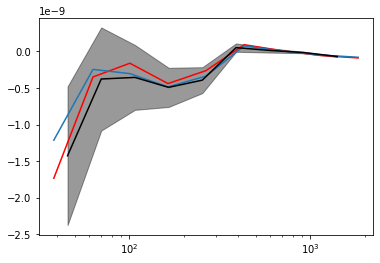

In [252]:
Plotting = u.Plotting(f'Primary {estimator}', lminplot = 30, lmaxplot = 2000, xscale = 'log')
Plotting.plotsel(NoahCents, 2*NoahP, color = 'red')
Plotting.plotsel(lCen, clpmanu)
Plotting.plotsel(ells, mean, scatter, color = 'black')
plt.xscale('log')
#plt.yscale('log')





In [253]:
tipo = 'S'
bias = read_element(tipo)
scatters = np.load(Path/f'scatter_{tipo}_{fgnamefile}_{nu}.npy')


scatter = scatters[index, index]
mean = bias[index, index]

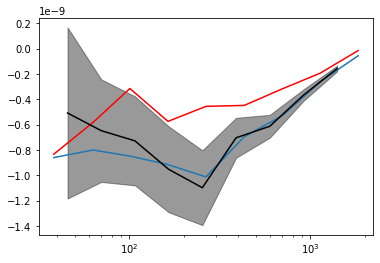

In [254]:
Plotting = u.Plotting(f'Secondary {estimator}', lminplot = 30, lmaxplot = 2000, xscale = 'log')
Plotting.plotsel(NoahCents, 2*NoahS, color = 'red')
Plotting.plotsel(lCen, clsmanu)
Plotting.plotsel(ells, mean, scatter, color = 'black')
plt.xscale('log')
#plt.yscale('log')